In [39]:
import osmnx
import matplotlib
import shapely.geometry
import geopandas
import contextily
import matplotlib.pyplot

# Retriwing data from OpenStreetMap

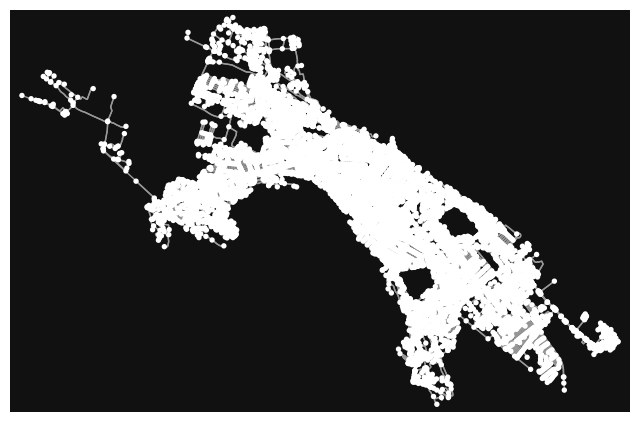

In [5]:
PLACE_NAME = "Makhachkala, Russia"
graph = osmnx.graph_from_place(PLACE_NAME)

figure, ax = osmnx.plot_graph(graph)

#Convert a graph to GeoDataFrames
nodes, edges = osmnx.graph_to_gdfs(graph)

# Get place boundary related to the place name as a geodataframe
area = osmnx.geocode_to_gdf(PLACE_NAME)

#Building footprints
buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {"building": True},
)
#Points-of-interest
restaurants = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "amenity": "restaurant"
    }
)
#Parks and green areas
parks = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "leisure": "park",
        "landuse": "grass",
    },
)


<AxesSubplot: >

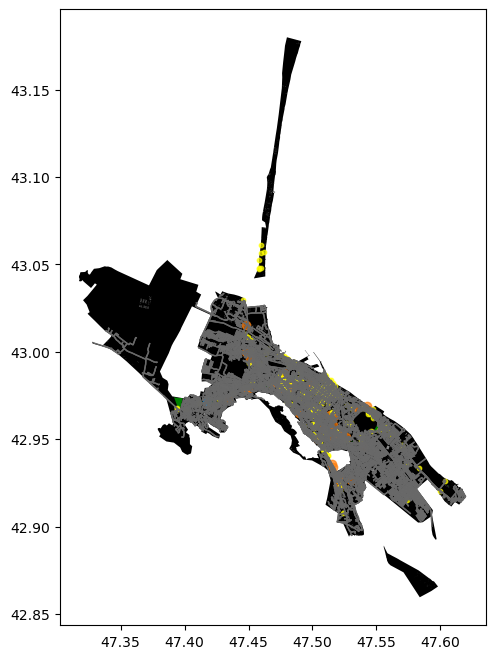

In [6]:
figure, ax = matplotlib.pyplot.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor="black")

# Plot parks
parks.plot(ax=ax, facecolor="green")

# Plot street ‘edges’
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")

# Plot buildings
buildings.plot(ax=ax, facecolor="silver", alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color="yellow", alpha=0.7, markersize=10)

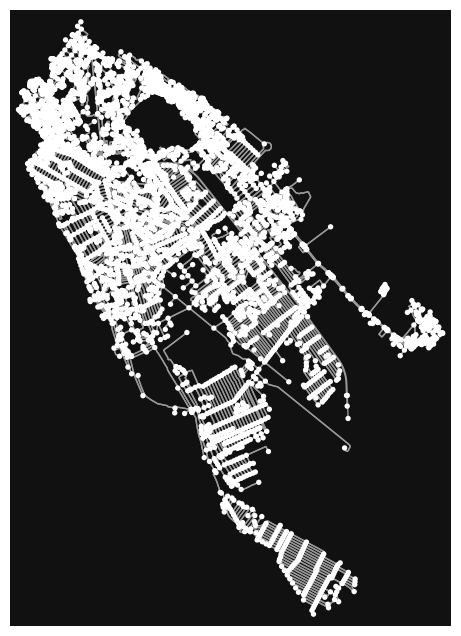

In [11]:
PLACE_NAME = "Ленинский район, Makhachkala, Russia"
graph = osmnx.graph_from_place(PLACE_NAME)

figure, ax = osmnx.plot_graph(graph)

#Convert a graph to GeoDataFrames
nodes, edges = osmnx.graph_to_gdfs(graph)

# Get place boundary related to the place name as a geodataframe
area = osmnx.geocode_to_gdf(PLACE_NAME)

#Building footprints
buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {"building": True},
)
#Points-of-interest
restaurants = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "amenity": "restaurant"
    }
)
#Parks and green areas
parks = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "leisure": "park",
        "landuse": "grass",
    },
)

<AxesSubplot: >

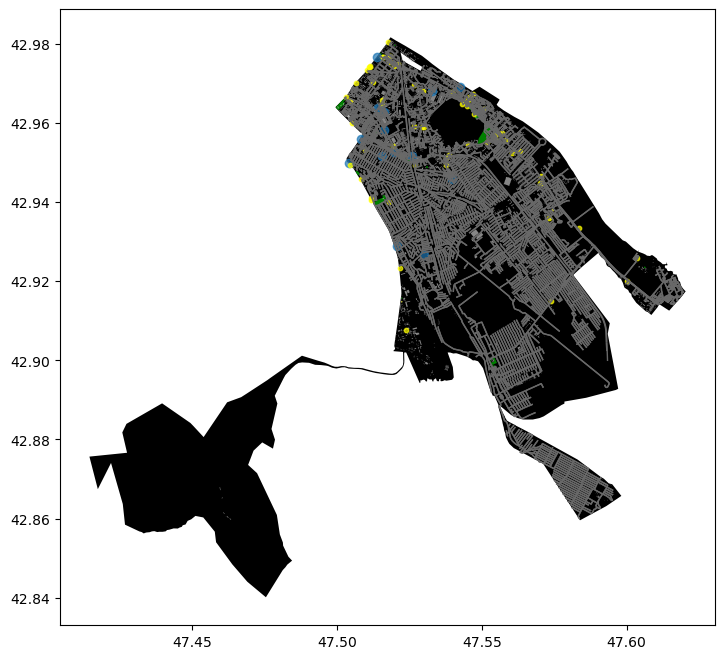

In [12]:
figure, ax = matplotlib.pyplot.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor="black")

# Plot parks
parks.plot(ax=ax, facecolor="green")

# Plot street ‘edges’
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")

# Plot buildings
buildings.plot(ax=ax, facecolor="silver", alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color="yellow", alpha=0.7, markersize=10)

# Network analysis in Python

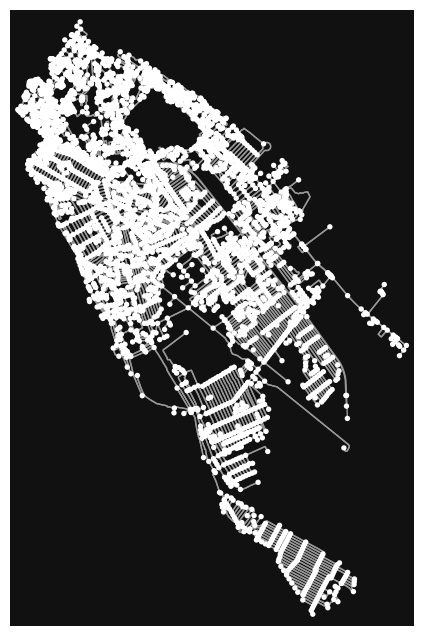

In [13]:
graph = osmnx.graph_from_place(
    PLACE_NAME,
    network_type="bike"
)
figure, ax = osmnx.plot_graph(graph)

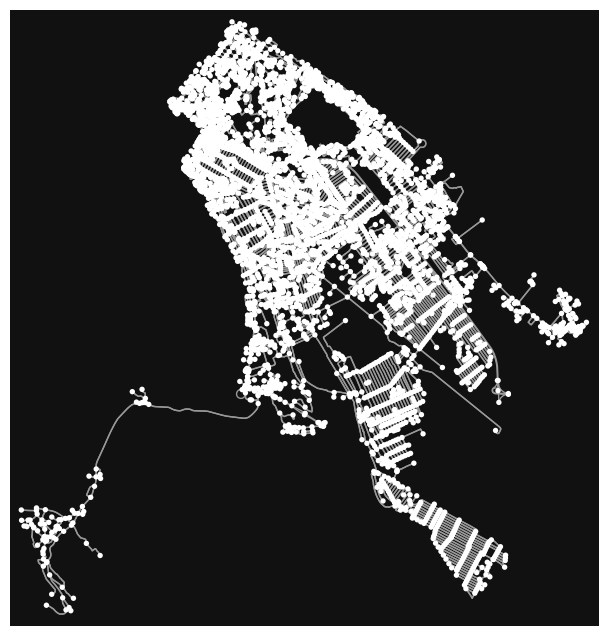

In [14]:
# Get the area of interest polygon
place_polygon = osmnx.geocode_to_gdf(PLACE_NAME)

# Re-project the polygon to a local projected CRS (so that the CRS unit is meters)
place_polygon = place_polygon.to_crs("EPSG:3067")

# Buffer by 200 meters
place_polygon["geometry"] = place_polygon.buffer(200)

# Re-project the polygon back to WGS84 (required by OSMnx)
place_polygon = place_polygon.to_crs("EPSG:4326")

# Retrieve the network graph
graph = osmnx.graph_from_polygon(
    place_polygon.at[0, "geometry"],
    network_type="bike"
)

fig, ax = osmnx.plot_graph(graph)

In [15]:
# Retrieve only edges from the graph
edges = osmnx.graph_to_gdfs(graph, nodes=False, edges=True)
edges.head()

osmid  oneway      highway reversed   length  \
u         v          key                                                     
798352833 6225840448 0    660038649    True      primary    False   68.471   
          1802052889 0     77810539    True  residential    False   66.383   
798352834 9153109669 0    781186765    True      primary    False   43.695   
          9152856695 0    990526314   False      service    False  101.077   
798352837 7293725284 0    781186765    True      primary    False   37.782   

                         lanes maxspeed  \
u         v          key                  
798352833 6225840448 0     NaN      NaN   
          1802052889 0       2       60   
798352834 9153109669 0     NaN      NaN   
          9152856695 0     NaN      NaN   
798352837 7293725284 0     NaN      NaN   

                                                                   geometry  \
u         v          key                                                      
798352833 6225840448 0    LINESTRING (47.52811 42.95047, 47.52895 42.95055)   
          1802052889 0    LINESTRING (47.52811 42.95047, 47.52830 42.950...   
798352834 9153109669 0    LINESTRING (47.53043 42.95063, 47.53068 42.950...   
          9152856695 0    LINESTRING (47.53043 42.95063, 47.53058 42.950...   
798352837 7293725284 0    LINESTRING (47.53265 42.95151, 47.53311 42.95157)   

                         name junction bridge service  ref width access tunnel  
u         v          key                                                        
798352833 6225840448 0    NaN      NaN    NaN     NaN  NaN   NaN    NaN    NaN  
          1802052889 0    NaN      NaN    NaN     NaN  NaN   NaN    NaN    NaN  
798352834 9153109669 0    NaN      NaN    NaN     NaN  NaN   NaN    NaN    NaN  
          9152856695 0    NaN      NaN    NaN     NaN  NaN   NaN    NaN    NaN  
798352837 7293725284 0    NaN      NaN    NaN     NaN  NaN   NaN    NaN    NaN

In [16]:
# Transform the graph to UTM
graph = osmnx.project_graph(graph) 

# Extract reprojected nodes and edges
nodes, edges = osmnx.graph_to_gdfs(graph)

nodes.crs

<Derived Projected CRS: +proj=utm +zone=38 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 38N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
# Calculate network statistics
osmnx.basic_stats(graph)

{'n': 5393,
 'm': 12983,
 'k_avg': 4.814759873910625,
 'edge_length_total': 1431324.1770000178,
 'edge_length_avg': 110.2460276515457,
 'streets_per_node_avg': 2.5972557018357127,
 'streets_per_node_counts': {0: 0,
  1: 1454,
  2: 11,
  3: 3191,
  4: 728,
  5: 8,
  6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.26960875208603746,
  2: 0.0020396810680511773,
  3: 0.5916929352864825,
  4: 0.13498980159465973,
  5: 0.0014834044131281292,
  6: 0.00018542555164101615},
 'intersection_count': 3939,
 'street_length_total': 764332.5029999984,
 'street_segment_count': 6950,
 'street_length_avg': 109.97589971222999,
 'circuity_avg': 1.0629065109465554,
 'self_loop_proportion': 0.004028776978417266}

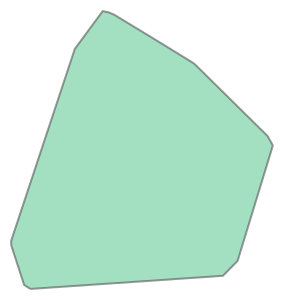

In [18]:
convex_hull = edges.unary_union.convex_hull
convex_hull

In [19]:
stats = osmnx.basic_stats(graph, area=convex_hull.area)
stats

{'n': 5393,
 'm': 12983,
 'k_avg': 4.814759873910625,
 'edge_length_total': 1431324.1770000178,
 'edge_length_avg': 110.2460276515457,
 'streets_per_node_avg': 2.5972557018357127,
 'streets_per_node_counts': {0: 0,
  1: 1454,
  2: 11,
  3: 3191,
  4: 728,
  5: 8,
  6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.26960875208603746,
  2: 0.0020396810680511773,
  3: 0.5916929352864825,
  4: 0.13498980159465973,
  5: 0.0014834044131281292,
  6: 0.00018542555164101615},
 'intersection_count': 3939,
 'street_length_total': 764332.5029999984,
 'street_segment_count': 6950,
 'street_length_avg': 109.97589971222999,
 'circuity_avg': 1.0629065109465554,
 'self_loop_proportion': 0.004028776978417266,
 'node_density_km': 41.83300478280325,
 'intersection_density_km': 30.55446056730243,
 'edge_density_km': 11102.649942922988,
 'street_density_km': 5928.856898507494}

In [29]:
origin = (
    osmnx.geocode_to_gdf("Ленинский район, Makhachkala, Russia")  # fetch geolocation
    .to_crs(edges.crs)  # transform to UTM
    .at[0, "geometry"]  # pick geometry of first row
    .centroid  # use the centre point
)

destination = (
    osmnx.geocode_to_gdf("Ak Gyol Lake")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid
)

In [30]:
origin_node_id = osmnx.nearest_nodes(graph, origin.x, origin.y)
origin_node_id

4241449514

In [31]:
destination_node_id = osmnx.nearest_nodes(graph, destination.x, destination.y)
destination_node_id

1652214874

In [32]:
route = osmnx.shortest_path(graph, origin_node_id, destination_node_id)
route

[4241449514,
 4241449516,
 4241449512,
 4241449509,
 4176529262,
 4176529269,
 4176529260,
 9149636688,
 2955397341,
 2955397336,
 4242471083,
 9149937625,
 973894773,
 973894191,
 973894358,
 973890832,
 973896841,
 3687329592,
 3687329590,
 973872503,
 973870291,
 4279834909,
 4312369981,
 4312369983,
 3446941694,
 973869527,
 973869704,
 973870299,
 973870301,
 1729134440,
 973872795,
 1729134583,
 973872305,
 5948120809,
 973870311,
 973872120,
 973867691,
 973867931,
 992452810,
 973867513,
 973867551,
 973867619,
 992452652,
 973866510,
 929034723,
 929029264,
 929030149,
 929036825,
 929036884,
 929037052,
 3298232896,
 920427424,
 920427134,
 926077991,
 920423741,
 920423176,
 10211349644,
 10211349643,
 920663942,
 920663943,
 5887063571,
 798352833,
 1802052889,
 9152856698,
 914836983,
 1802052790,
 914808685,
 10603954889,
 10153969901,
 10153969900,
 10153969898,
 10673754238,
 10153969889,
 10153969888,
 10153969886,
 10153969883,
 10153969881,
 10153969880,
 6235374326,

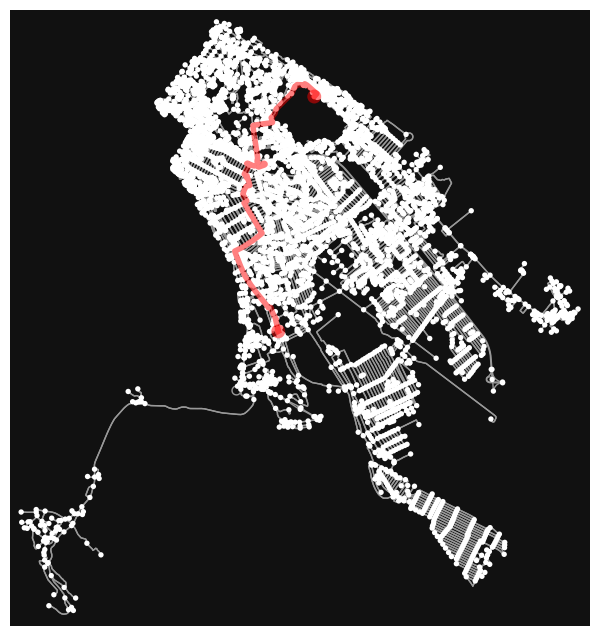

In [33]:
# Plot the shortest path
fig, ax = osmnx.plot_graph_route(graph, route)

In [34]:
# Get the nodes along the shortest path
route_nodes = nodes.loc[route]
route_nodes

,y,x,street_count,lon,lat,highway,geometry
osmid,,,,,,,
4241449514,4.754387e+06,706574.985056,1,47.530820,42.914129,NaN,POINT (706574.985 4754386.622)
4241449516,4.754442e+06,706555.348943,3,47.530600,42.914631,NaN,POINT (706555.349 4754441.842)
4241449512,4.754445e+06,706568.829931,3,47.530766,42.914659,NaN,POINT (706568.830 4754445.360)
4241449509,4.754588e+06,706527.527568,3,47.530313,42.915956,NaN,POINT (706527.528 4754588.263)
4176529262,4.754689e+06,706520.302258,4,47.530262,42.916865,NaN,POINT (706520.302 4754689.097)
...,...,...,...,...,...,...,...
6244056388,4.760304e+06,707200.224005,4,47.540662,42.967197,NaN,POINT (707200.224 4760304.333)
9870311442,4.760322e+06,707210.404399,3,47.540793,42.967352,NaN,POINT (707210.404 4760321.848)
9870311443,4.760133e+06,707440.438389,3,47.543541,42.965593,NaN,POINT (707440.438 4760133.283)


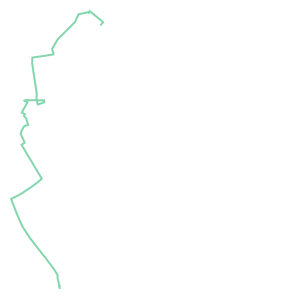

In [35]:
# Create a geometry for the shortest path
route_line = shapely.geometry.LineString(
    list(route_nodes.geometry.values)
)
route_line

In [37]:


route_geom = geopandas.GeoDataFrame(
    {
        "geometry": [route_line],
        "osm_nodes": [route],
    },
    crs=edges.crs
)

# Calculate the route length
route_geom["length_m"] = route_geom.length

route_geom.head()

,geometry,osm_nodes,length_m
0,"LINESTRING (706574.985 4754386.622, 706555.349...","[4241449514, 4241449516, 4241449512, 424144950...",8949.850866


In [38]:
buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "building" : True
    }
).to_crs(edges.crs)

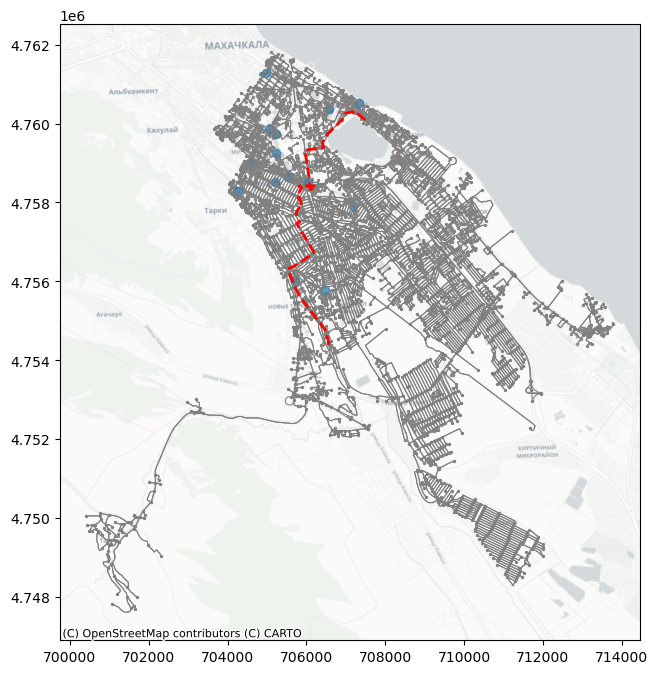

In [40]:


fig, ax = matplotlib.pyplot.subplots(figsize=(12,8))

# Plot edges and nodes
edges.plot(ax=ax, linewidth=0.75, color='gray')
nodes.plot(ax=ax, markersize=2, color='gray')

# Add buildings
ax = buildings.plot(ax=ax, facecolor='lightgray', alpha=0.7)

# Add the route
ax = route_geom.plot(ax=ax, linewidth=2, linestyle='--', color='red')

# Add basemap
contextily.add_basemap(ax, crs=buildings.crs, source=contextily.providers.CartoDB.Positron)
